<a href="https://colab.research.google.com/github/Sai-krishna-33/CODSOFT/blob/main/customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   CustomerID  Gender  Age  Tenure        Balance  NumOfProducts  HasCrCard  \
0           1  Female   41       7   99969.678583              2          0   
1           2    Male   28       4  106312.525708              2          0   
2           3  Female   44       8  163499.489075              1          0   
3           4    Male   51       3  245941.322193              3          0   
4           5  Female   40       1  114312.294793              1          0   

   IsActiveMember  EstimatedSalary  Exited  
0               1    108638.146136       0  
1               1     72868.697264       0  
2               0     69278.202556       0  
3               0     80663.146526       0  
4               0    146140.767783       1  
Missing values in each column:
 Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


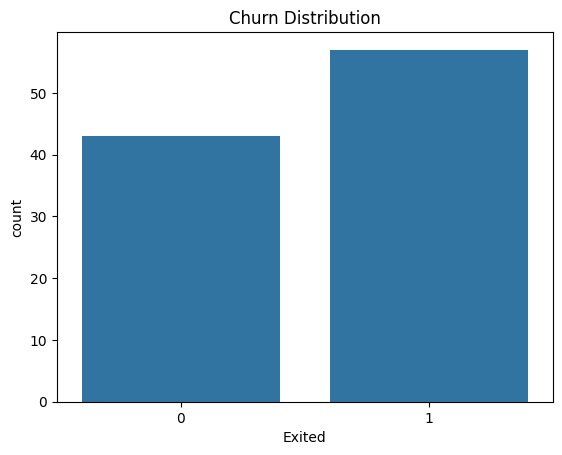

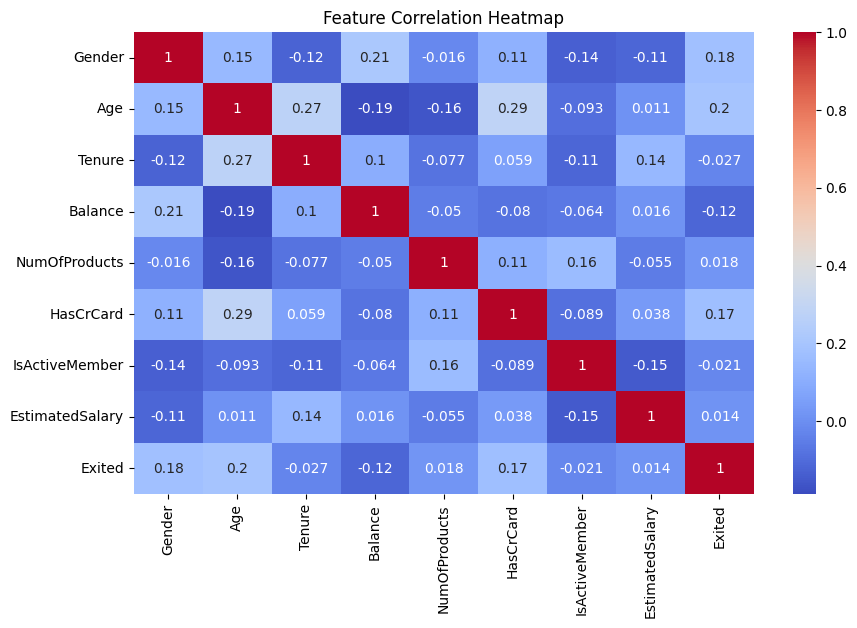

Accuracy: 0.5

Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.56      0.50         9
           1       0.56      0.45      0.50        11

    accuracy                           0.50        20
   macro avg       0.51      0.51      0.50        20
weighted avg       0.51      0.50      0.50        20


Confusion Matrix:
 [[5 4]
 [6 5]]


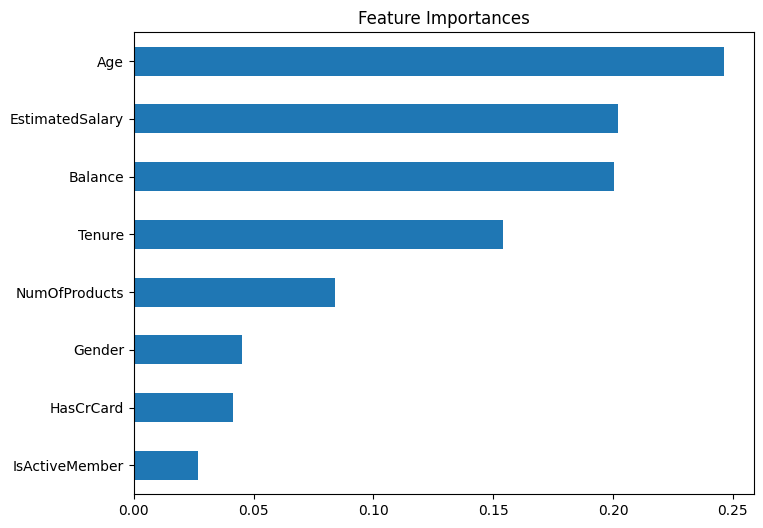

Prediction for sample customer: Churned


In [2]:
# Bank Customer Churn Prediction Full Example

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Simulate a sample bank customer churn dataset
data = {
    'CustomerID': range(1, 101),
    'Gender': np.random.choice(['Male', 'Female'], 100),
    'Age': np.random.randint(18, 70, 100),
    'Tenure': np.random.randint(0, 10, 100),
    'Balance': np.random.uniform(0, 250000, 100),
    'NumOfProducts': np.random.randint(1, 4, 100),
    'HasCrCard': np.random.choice([0, 1], 100),
    'IsActiveMember': np.random.choice([0, 1], 100),
    'EstimatedSalary': np.random.uniform(10000, 150000, 100),
    'Exited': np.random.choice([0, 1], 100)  # Target variable: 1 means churned
}

df = pd.DataFrame(data)

# Show first few rows
print(df.head())

# --- Data Preprocessing ---

# Drop CustomerID as it's not a useful feature for prediction
df.drop('CustomerID', axis=1, inplace=True)

# Encode categorical variables (Gender)
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male=1, Female=0

# Check for missing values
print("Missing values in each column:\n", df.isnull().sum())

# --- Exploratory Data Analysis (Optional) ---
# Plot churn distribution
sns.countplot(x='Exited', data=df)
plt.title("Churn Distribution")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# --- Prepare data for model ---

X = df.drop('Exited', axis=1)
y = df['Exited']

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Model Training ---

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# --- Model Evaluation ---

y_pred = rf.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Feature importance
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.sort_values().plot(kind='barh', figsize=(8,6))
plt.title("Feature Importances")
plt.show()

# --- Predict on new sample ---
sample = pd.DataFrame({
    'Gender': [1],  # Male
    'Age': [35],
    'Tenure': [5],
    'Balance': [60000],
    'NumOfProducts': [2],
    'HasCrCard': [1],
    'IsActiveMember': [1],
    'EstimatedSalary': [50000]
})

sample_scaled = scaler.transform(sample)
sample_pred = rf.predict(sample_scaled)
print(f"Prediction for sample customer: {'Churned' if sample_pred[0] == 1 else 'Not Churned'}")
